#$\quad$ Market model

Let us assume that the market consists of 500 securities. To estimate portfolio $M$, we need the variance-covariance matrix, i.e. a matrix of 500x500= 250,000 cells. That is, 500 variances and 124,750 covariances. Therefore, it was proposed to use market indices as a proxy for portfolio $M$. And to estimate the beta using the following regression:  

$$\Large  R_{i,t} - R_f = \alpha_i + \beta_i (R_{Mt} - R_f) + \epsilon_{i,t} $$

$$\Large \pi_i=\alpha_i + \beta_i \pi_{Mt}+ \epsilon_{i,t}$$

where:

- $ R_{it} $: Return on the individual asset
- $ \alpha_i $: Alpha of the asset
- $ \beta_i $: Beta of the asset
- $ R_{mt} $: Market index return
- $ \epsilon_i $: Error term
- $ \pi_i = R_i - R_f $: Risk premium

The estimation of the model requires that a set of assumptions be satisfied:
1. $E(\varepsilon_{it})=0$
2. $\sigma^2(\varepsilon_{it})=\sigma^2_i, \forall t$
3. $cov(\varepsilon_{it},r_{it})=0,\forall t$
4. $cov(\varepsilon_{it},\varepsilon_{it'})=0, \forall t\neq t'$
5. $cov(\varepsilon_{it},\varepsilon_{jt})=0, \forall i\neq j$
6. $N[0,\sigma^2_\varepsilon ]$

## 1. Performance Analysis of a Company, Portfolio or Fund: Alpha and Beta

- $\alpha_i$ is the part of the asset's return that is constant over time and does not depend on systematic risk.
- $\beta_i$ is the part of the return that depends on market behaviour and is therefore **systematic risk**.
- $\varepsilon_{it}$ is the random disturbance of the security, caused by unpredictable events, and is therefore a measure of **specific risk**.

### Interpretation of the model at firm level

**Beta** ($\beta_i$) defines the slope of the model. It is an indicator of how much of the asset's return is correlated with the market return.

- **Interpretation**:
  - **Beta > 1**: The asset amplifies market behaviour and has a high level of systematic risk, so it should offer higher returns than the market.
  - **Beta < 1**: The asset attenuates market behaviour. It has a lower level of systematic risk and should therefore offer lower returns than the market.
  - **Beta ≈ 1**: The asset behaves like the market and should offer market returns.

**Beta** helps us understand how much of an asset's return is attributable to market movements.

#### Factors that Influence the Market Beta Value of a firm

- **Type of Sector**: impact of the economic cycle on the sector.

- **Product Diversification**: Companies with diversified products or services tend to have lower betas.

- **Geographic Diversification**: The impact of geographic diversification of activity on systematic risk is not obvious, as there are conflicting effects. On the one hand, geographic diversification of activity should reduce systematic risk, but this process requires assuming new sources of risk, such as exchange rate risk and country risk, with an uncertain result on beta.

- **Financial Structure**: Greater financial leverage (debt) implies a higher beta.

**Alpha**

If we define the excess return of a portfolio as $\pi_i=\mu_i-r_f$, the market model proposes:

$$\pi_i=\alpha_i+ \beta_i \pi_M$$

If $\alpha_i \neq 0$, for some reason the asset is required to yield a return above or below what it should offer based on its level of systematic risk. This calls the CAPM into question and could be interpreted as follows:
- $\alpha_i <0$ the asset is overvalued
- $\alpha_i >0$ the asset is undervalued

#### **The risk of a security**

The volatility of an asset is defined by the following expression:

$$\sigma^2(\pi_{it})=\sigma^2(\alpha_i+\beta_i \pi_{M,t}\varepsilon_{it})=$$
$$\beta_i^2\sigma^2(\pi_{Mt})+\sigma^2(\varepsilon_{it})$$

The first part of the equation represents systematic risk and the second part represents specific risk, but remember that the market only rewards systematic risk.

## 2. Model results with some assets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cvxpy as cp
import plotly.graph_objects as go
from tqdm.auto import tqdm
import statsmodels.api as sm
import warnings
from datetime import datetime, timedelta

# print(plt.style.available) #list of available styles
#plt.style.use('ggplot')
# Configura el estilo de Seaborn para que los gráficos se vean más atractivos
sns.set(style="whitegrid")

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)

### ANALYSE SOME INDIVIDUAL ACTIONS

Vamos a analizar un activo empleando del modelo de mercado. Elegimos la acción de Endesa y como índice de mercado usamos el IBEX35:

In [2]:
precios_endesa = yf.download("ELE.MC", start="2010-01-01", end="2025-10-30",auto_adjust=True)["Close"] # Precios ajustados al cierre
precios_endesa = precios_endesa.dropna() # Eliminar filas con NA's
rendimientos_endesa = np.log(precios_endesa).diff().dropna()

precios_ibex35 = yf.download("^IBEX", start="2010-01-01", end="2025-10-30",auto_adjust=True)["Close"] # Precios ajustados al cierre
precios_ibex35 = precios_ibex35.dropna() # Eliminar filas con NA's
rendimientos_ibex35 = np.log(precios_ibex35).diff().dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


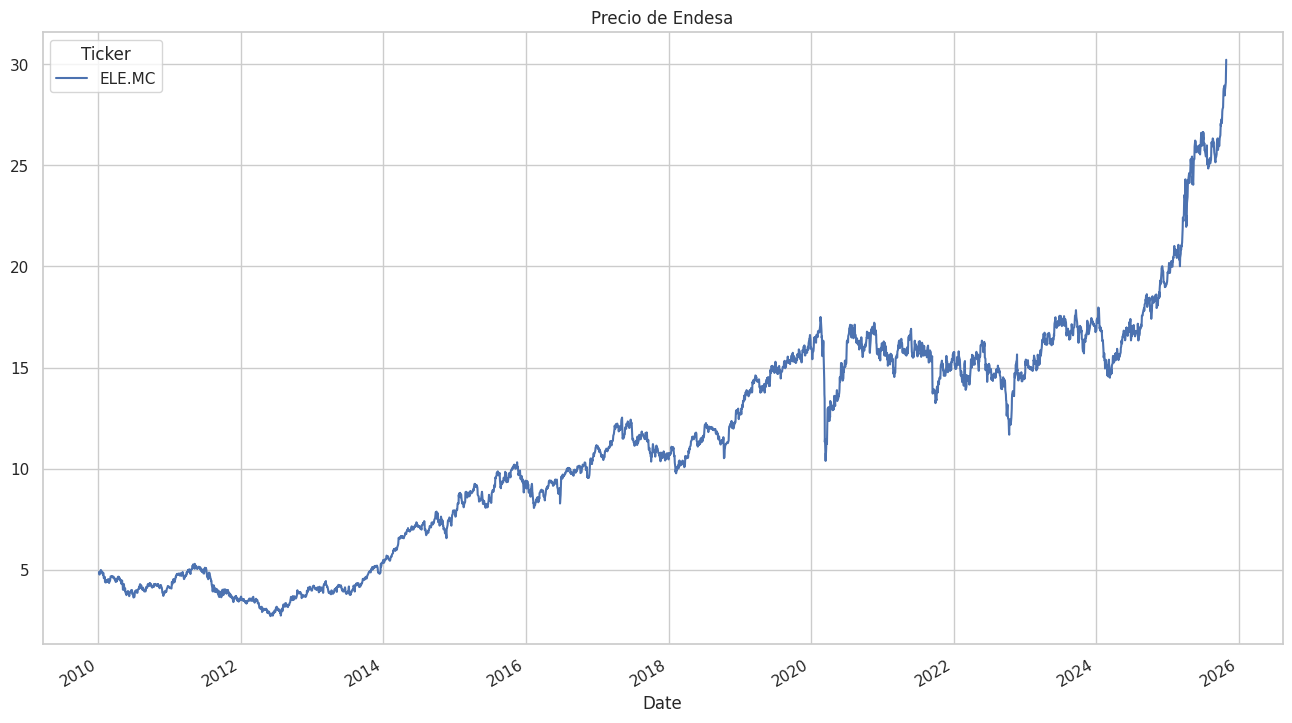

In [3]:
precios_endesa.plot(title="Precio de Endesa")
plt.show()

### Ejercicio 1: Estima la beta de ENDESA

- Indice= IBEX35
- Periodo temporal: 1/01/2010 a 31/11/2025
- Periodicidad: Diaria

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Activo: ENDESA
Beta: 0.6695
Alpha: 0.000397
R²: 0.3888
P-value beta: 0.000000e+00


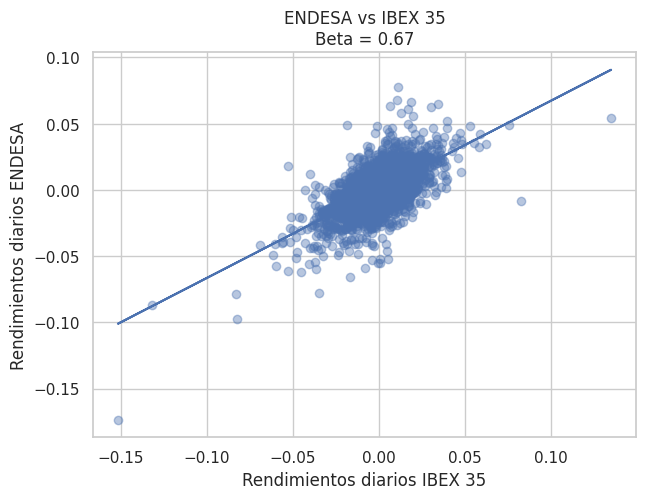

In [8]:
# =========================================
# EJERCICIO: ESTIMACIÓN DE BETA ENDESA vs IBEX
# =========================================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ------------------------------
# Parámetros
# ------------------------------
start = "2010-01-01"
end = "2025-11-30"

ticker_endesa = "ELE.MC"
indice_mercado = "^IBEX"

# ------------------------------
# Descarga IBEX 35
# ------------------------------
precios_ibex = yf.download(
    indice_mercado,
    start=start,
    end=end,
    auto_adjust=True
)["Close"].dropna()

rend_ibex = np.log(precios_ibex).diff().dropna()

# ------------------------------
# Descarga ENDESA
# ------------------------------
precios_endesa = yf.download(
    ticker_endesa,
    start=start,
    end=end,
    auto_adjust=True
)["Close"].dropna()

rend_endesa = np.log(precios_endesa).diff().dropna()

# ------------------------------
# Alinear fechas
# ------------------------------
datos = pd.concat([rend_endesa, rend_ibex], axis=1).dropna()
datos.columns = ["Endesa", "Mercado"]

# ------------------------------
# Regresión lineal (CAPM)
# ------------------------------
beta, alpha, r_value, p_value, std_err = linregress(
    datos["Mercado"],
    datos["Endesa"]
)

# ------------------------------
# Resultados
# ------------------------------
print("Activo: ENDESA")
print(f"Beta: {beta:.4f}")
print(f"Alpha: {alpha:.6f}")
print(f"R²: {r_value**2:.4f}")
print(f"P-value beta: {p_value:.6e}")

# ------------------------------
# Gráfico de regresión
# ------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(
    datos["Mercado"],
    datos["Endesa"],
    alpha=0.4
)
plt.plot(
    datos["Mercado"],
    alpha + beta * datos["Mercado"]
)
plt.xlabel("Rendimientos diarios IBEX 35")
plt.ylabel("Rendimientos diarios ENDESA")
plt.title(f"ENDESA vs IBEX 35\nBeta = {beta:.2f}")
plt.grid(True)
plt.show()


### Ejercicio 2: Estima la beta de los siguientes activos

- Activos: Telefónica, Jhonson & Jhonson, Ford
- Indice= IBEX35
- Periodo temporal: 1/01/2010 a 31/11/2025
- Periodicidad: Diaria

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Activo: Telefónica
Beta: 0.9100
Alpha: -0.000215
R²: 0.5786
----------------------------------------


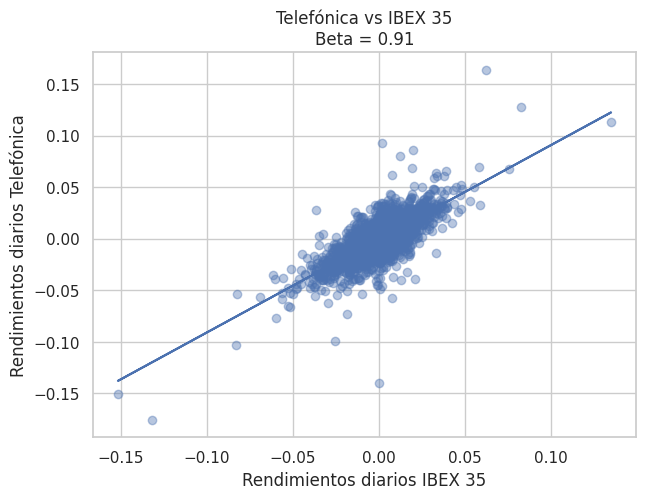

[*********************100%***********************]  1 of 1 completed


Activo: Johnson & Johnson
Beta: 0.2376
Alpha: 0.000398
R²: 0.0908
----------------------------------------


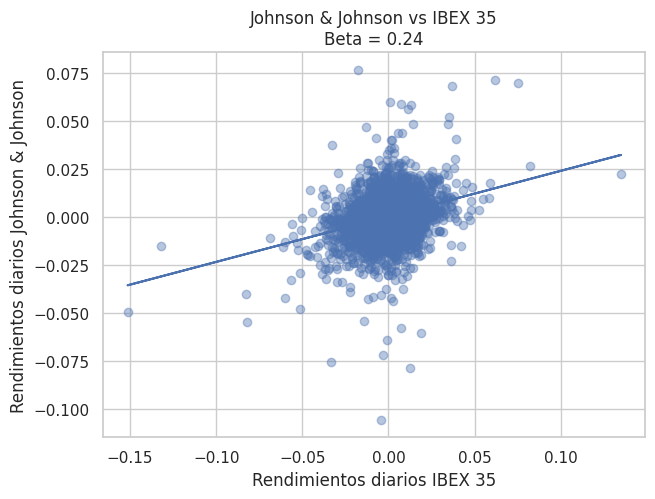

[*********************100%***********************]  1 of 1 completed


Activo: Ford
Beta: 0.6247
Alpha: 0.000179
R²: 0.1521
----------------------------------------


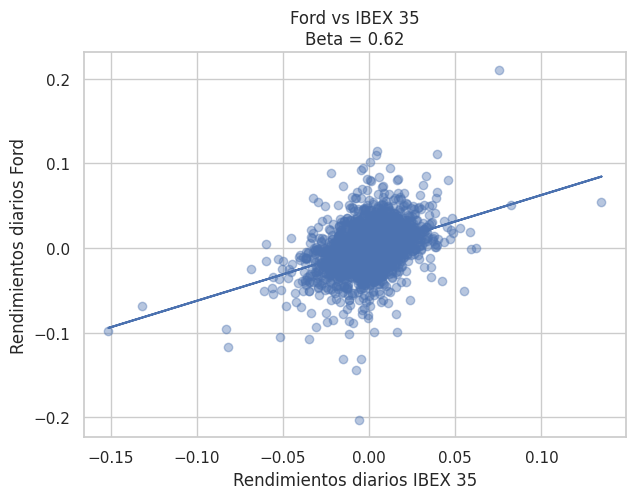

In [7]:
# ==============================
# EJERCICIO 2: ESTIMACIÓN DE BETAS
# ==============================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ------------------------------
# Parámetros
# ------------------------------
start = "2010-01-01"
end = "2025-11-30"

activos = {
    "Telefónica": "TEF.MC",
    "Johnson & Johnson": "JNJ",
    "Ford": "F"
}

indice_mercado = "^IBEX"

# ------------------------------
# Descarga IBEX 35
# ------------------------------
precios_ibex = yf.download(
    indice_mercado,
    start=start,
    end=end,
    auto_adjust=True
)["Close"].dropna()

rend_ibex = np.log(precios_ibex).diff().dropna()

# ------------------------------
# Función para calcular beta y graficar
# ------------------------------
def estimar_beta(activo, ticker):

    # Descargar precios del activo
    precios = yf.download(
        ticker,
        start=start,
        end=end,
        auto_adjust=True
    )["Close"].dropna()

    # Rendimientos logarítmicos diarios
    rend_activo = np.log(precios).diff().dropna()

    # Alinear fechas con el mercado
    datos = pd.concat([rend_activo, rend_ibex], axis=1).dropna()
    datos.columns = ["Activo", "Mercado"]

    # Regresión lineal (CAPM)
    beta, alpha, r_value, p_value, std_err = linregress(
        datos["Mercado"],
        datos["Activo"]
    )

    # Resultados por pantalla
    print(f"Activo: {activo}")
    print(f"Beta: {beta:.4f}")
    print(f"Alpha: {alpha:.6f}")
    print(f"R²: {r_value**2:.4f}")
    print("-" * 40)

    # --------------------------
    # Gráfico de regresión
    # --------------------------
    plt.figure(figsize=(7, 5))
    plt.scatter(
        datos["Mercado"],
        datos["Activo"],
        alpha=0.4
    )
    plt.plot(
        datos["Mercado"],
        alpha + beta * datos["Mercado"]
    )
    plt.xlabel("Rendimientos diarios IBEX 35")
    plt.ylabel(f"Rendimientos diarios {activo}")
    plt.title(f"{activo} vs IBEX 35\nBeta = {beta:.2f}")
    plt.grid(True)
    plt.show()


# ------------------------------
# Cálculo de betas
# ------------------------------
for activo, ticker in activos.items():
    estimar_beta(activo, ticker)
